In [1]:
import acoular
from os import path
import pylab as plt

# Process audio data, read and then into FFT
ts = acoular.TimeSamples( name = 'three_sources.h5' )
ps = acoular.PowerSpectra ( time_data=ts, block_size=128, window='Rectangular' )

# Create the scene: a grid to work on and mic positions
rg = acoular.RectGrid( x_min=-0.2, x_max=0.2, y_min=-0.2, y_max=0.2, z=0.3, increment = 0.01 )
micgeofile = path.join(path.split(acoular.__file__)[0], 'xml', 'array_64.xml')
print(f"Using microphone file {micgeofile}")
mg = acoular.MicGeom( from_file=micgeofile )

# Prepare Beamformer
st = acoular.SteeringVector( grid=rg, mics=mg )
bb = acoular.BeamformerBase( freq_data=ps, steer=st )

# Calc bf algo, at 8000Hz, 3rd of an Octave
# pm = bb.synthetic( 3000, 3 )
# lm = acoular.L_p( pm )

/home/tys/.local/share/virtualenvs/lab-ED5LvMyb/lib/python3.11/site-packages/acoular/__init__.py:15: UserWarning: We detected that Numpy is already loaded and uses OpenBLAS. Because this conflicts with Numba parallel execution, we disable parallel execution for now and processing might be slower. To speed up, either import Numpy after Acoular or set environment variable OPENBLAS_NUM_THREADS=1 before start of the program.
  from .configuration import config
Exception occurred in traits notification handler for object: <acoular.sources.TimeSamples object at 0x7ffedc71e0c0>, trait: basename, old value: None, new value: three_sources
Traceback (most recent call last):
  File "/home/tys/.local/share/virtualenvs/lab-ED5LvMyb/lib/python3.11/site-packages/traits/trait_notifiers.py", line 524, in _dispatch_change_event
    self.dispatch(handler, *args)
  File "/home/tys/.local/share/virtualenvs/lab-ED5LvMyb/lib/python3.11/site-packages/traits/trait_notifiers.py", line 486, in dispatch
    handl

Using microphone file /home/tys/.local/share/virtualenvs/lab-ED5LvMyb/lib/python3.11/site-packages/acoular/xml/array_64.xml


the beamforming result mapped onto the grid is queried for a frequency of 8000 Hz and over a third-octave wide frequency band (thus the ‘3’ in the second argument).

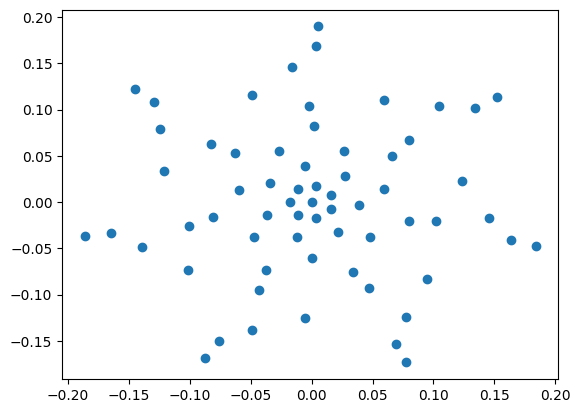

In [4]:
plt.ion()
plt.plot(mg.mpos[0], mg.mpos[1], 'o')

In [5]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

plt.figure()
@interact(vmin=widgets.IntSlider(min=50, max=100, step=1, value=80),
          vmax=widgets.IntSlider(min=50, max=100, step=1, value=100),
          freq=widgets.IntSlider(min=100, max=25000, step=100, value=8000),
          fwidth=widgets.IntSlider(min=1, max=8, step=1, value=3) )
def plot(vmin, vmax, freq, fwidth):
    pm = bb.synthetic( freq, fwidth )
    lm = acoular.L_p( pm )

    plt.imshow( lm.T, origin='lower', vmin=lm.max()*vmin/100, vmax=lm.max()*vmax/100, extent=rg.extend(), interpolation='bicubic')
    plt.colorbar()
    

<Figure size 640x480 with 0 Axes>

interactive(children=(IntSlider(value=80, description='vmin', min=50), IntSlider(value=100, description='vmax'…